# Answer to question (e)
(Programming.) Use the 10-armed testbed (see http://incompleteideas.net/book/2/node3.html) to compare with the greedy and e-greedy method

- A greedy (epsilon = 0) strategy with an optimistic initial value Q_0 = 5.

- An epsilon = 0.1, 0.01 greedy strategy using upper-confidence-bound (UCB) action selection with c = 2.

## Strategy

We will compare two methods for solving this problem:

- The first one will be the greedy strategy with optimistic initial values. We will initialize the action-value estimates with a high value Q_0 = 5 in order to encourage exploration initially.

- The other one is the epsilon-greedy strategy with UCB action selection for different values of espilon. We will implement it by coosing the action with the highest estimated value plus a bonus (for the UCB) that decreases as the action is chosen more often.

To do this program, we will define functions to simulate the different strategies with a 10-armed testbed. Each arm of the bandit will be simulated as having a true value (This will be the mean reward) and each pull of an arm returns a reward with the mean and a Gaussian noise.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The bandit function

The 'bandit' function is used to simulate the k-armed bandit problem, we will then compare the different strategies with different parameters to compare the performances with a number of steps and runs.

### Parameters

- n : It is the number of arms in the bandit problem. Each arm will be representing a possible action that the agent have the possibility to take. For this problem k will be equal to 10. For each arm there is a true value that we must find.

- t : It represents the numbers of steps that we will be doing for one simulation of the problem. At each step we will be choosing one of the 10 arms using the strategy, we will receive a reward and finally updating the estimates. In this problem we will do t decisions and for each decision we will choose an action.

- epsilon : This parameter will only be choosen in the epsilon greedy algorithm. It represents the exploration probability.

- Q_0 : It represents the initial estimations for the 10 possible actions. If we have a high value, it will encourage exploration, as we have already seen.

- c : It is the parameter for the UCB action selection.

- true_values : It represents the real values of each actions. We can recall that the true value of an action is the mean reward given that the action is selected.

- true_action : It represents the real action that we have to chose.

### Different steps

1. Initialization:

At the begining of each simulation, the action value estimates Q are set to the initial value which is Q_0 for all k different possibilities. We also initialize the count for each action which is N. We also initialize the rewards for each possibilities and the optimal_action.

In [2]:
def bandit(n, t, epsilon, Q_0, c, alpha, true_values, true_action):
    Q = np.ones(n) * Q_0 # We are initializing the value estimates
    N = np.zeros(n) # We are initializing the count for each actions

    rewards = np.zeros(t)
    optimal_action = np.zeros(t)

    for i in range(t):

        # This part will lead to the greedy algorithm
        # This part will lead to the epsilon greedy algorithm
        if np.random.rand() > epsilon and i > 0:
            U = c * np.sqrt(np.log(i)/(N+ 1e-10)) # We are computing the upper confidence bound
            choice = np.argmax(Q + U)
        else: 
            choice = np.random.randint(n)
        
        R = true_values[choice] + np.random.randn()  # The random will create some noise in order to create gaussian rewards
        N[choice] = N[choice] + 1
        Q[choice] = Q[choice] + alpha * (R - Q[choice])/N[choice] # We are updating the estimation using the formula from the course
        # By the law of large numbers this will converge to the true values. This is called a sample-average method for estimating action values.

        rewards[i] = R
        optimal_action[i] = (choice == true_action)

    return(rewards, true_action)


In [3]:
def simulation(simulation_number, n, t, epsilon, Q_0, c, alpha):
    true_values = np.random.randn(n) # We are setting here the true rewards for each actions
    true_action = np.argmax(true_values) # We are looking here for the best action among all the actions

    final_rewards = np.zeros(t)
    optimal_action_counts = np.zeros(t)

    for simulation in range(simulation_number):
        rewards, optimal_action = bandit(n, t, epsilon, Q_0, c, alpha, true_values, true_action)
    
        final_rewards = final_rewards + rewards
        optimal_action_counts = optimal_action_counts + optimal_action

    final_rewards = final_rewards / simulation_number
    optimal_action_percentage = optimal_action_counts / simulation_number * 100
    
    return final_rewards, optimal_action_percentage

In [23]:
# Run simulations
avg_rewards_greedy, opt_action_pct_greedy = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0, Q_0 = 0, c = 0, alpha = 1)
avg_rewards_ucb_01, opt_action_pct_ucb_01 = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0.1, Q_0 = 0, c = 0, alpha = 1)
avg_rewards_ucb_001, opt_action_pct_ucb_001 = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0.01, Q_0 = 0, c = 0, alpha = 1)

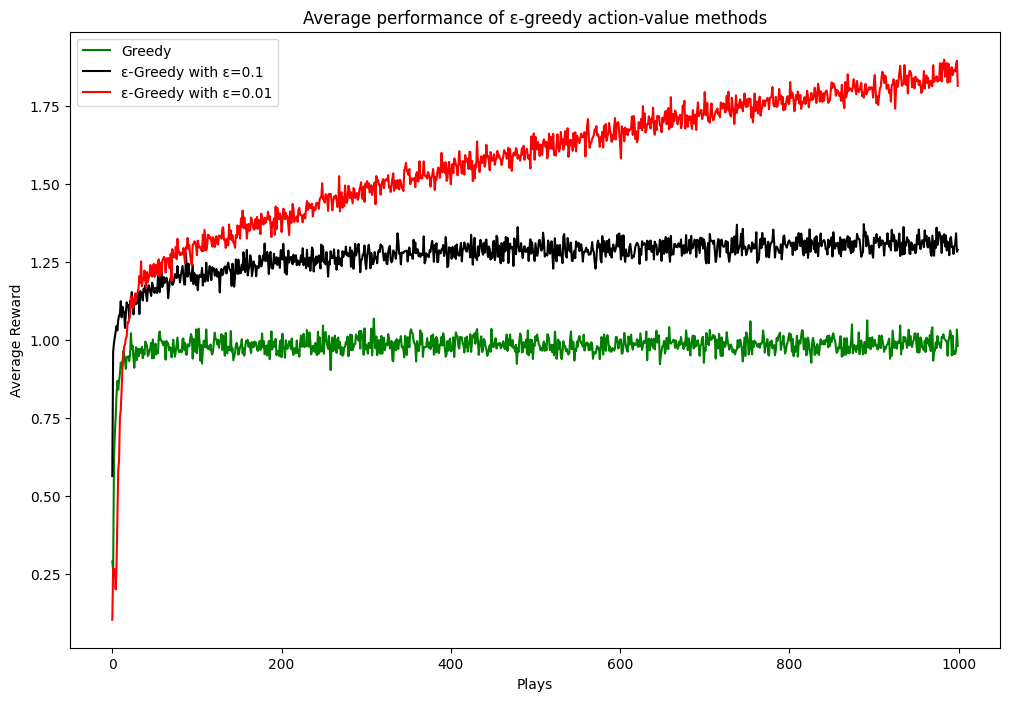

In [25]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(avg_rewards_greedy, label='Greedy', color='green')
plt.plot(avg_rewards_ucb_01, label='ε-Greedy with ε=0.1', color='black')
plt.plot(avg_rewards_ucb_001, label='ε-Greedy with ε=0.01', color='red')
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average performance of ε-greedy action-value methods')
plt.show()

We can see that using the same parameters as http://incompleteideas.net/book/2/node3.html, we can find the same result. In fact Figure 2.1 is similar from our result.

In [28]:
# Run simulations
avg_rewards_greedy, opt_action_pct_greedy = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0, Q_0 = 5, c = 0, alpha = 1)
avg_rewards_ucb_01, opt_action_pct_ucb_01 = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0.1, Q_0 = 5, c = 2, alpha = 1)
avg_rewards_ucb_001, opt_action_pct_ucb_001 = simulation(simulation_number = 2000, n = 10, t = 1000, epsilon = 0.01, Q_0 = 5, c = 2, alpha = 1)

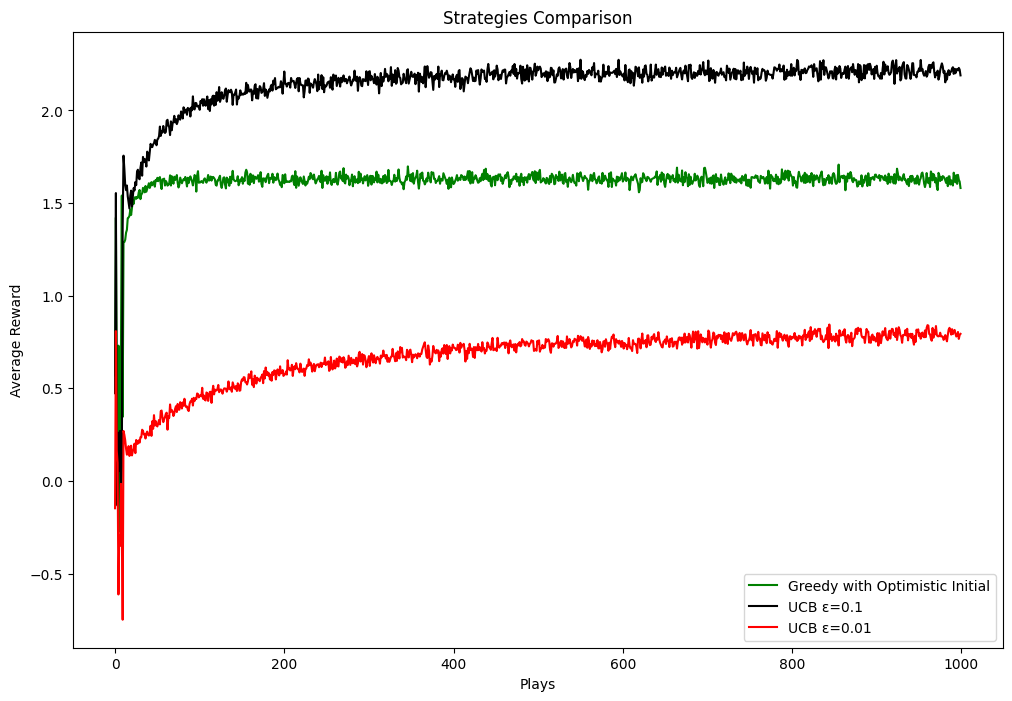

In [29]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(avg_rewards_greedy, label='Greedy with Optimistic Initial', color='green')
plt.plot(avg_rewards_ucb_01, label='UCB ε=0.1', color='black')
plt.plot(avg_rewards_ucb_001, label='UCB ε=0.01', color='red')
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Strategies Comparison')
plt.show()

Initially, the ε=0.01 greedy method exhibits a marginally quicker improvement compared to alternative strategies, yet it soon plateaus, settling at a comparatively lower performance level. On this testbed, it attains an average reward-per-step of approximately 0.75, which falls short of the optimal average of around 2.2. Over time, the greedy method's performance markedly deteriorates, primarily due to its tendency to persist with suboptimal actions.

# Answer to question (f)

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q∗(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q∗(a) on each step). Prepare plots like the ones demonstrated in class for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use e = 0.1 and longer runs, say of 10,000 steps.

In [30]:
def simulation_nonstationary(simulation_number, n, t, epsilon, Q_0, c, alpha):
    true_values = np.random.randn(n) # We are setting here the true rewards for each actions
    true_action = np.argmax(true_values) # We are looking here for the best action among all the actions

    final_rewards = np.zeros(t)
    optimal_action_counts = np.zeros(t)

    for simulation in range(simulation_number):
        rewards, optimal_action = bandit(n, t, epsilon, Q_0, c, true_values, true_action, alpha)
    
        final_rewards = final_rewards + rewards
        optimal_action_counts = optimal_action_counts + optimal_action

        true_values = true_values + np.random.normal(loc=0, scale=0.01, size=(n,1))
        true_action = np.argmax(true_values)

    final_rewards = final_rewards / simulation_number
    optimal_action_percentage = optimal_action_counts / simulation_number * 100
    
    return final_rewards, optimal_action_percentage

In [34]:
avg_rewards_ucb_01_nonstationary_1, opt_action_pct_ucb_01_nonstationary_1 = simulation(simulation_number = 2000, n = 10, t = 10000, epsilon = 0.1, Q_0 = 0, c = 0, alpha = 1)
avg_rewards_ucb_01_nonstationary_01, opt_action_pct_ucb_01_nonstationary_01 = simulation(simulation_number = 2000, n = 10, t = 10000, epsilon = 0.1, Q_0 = 0, c = 0, alpha = 0.1)

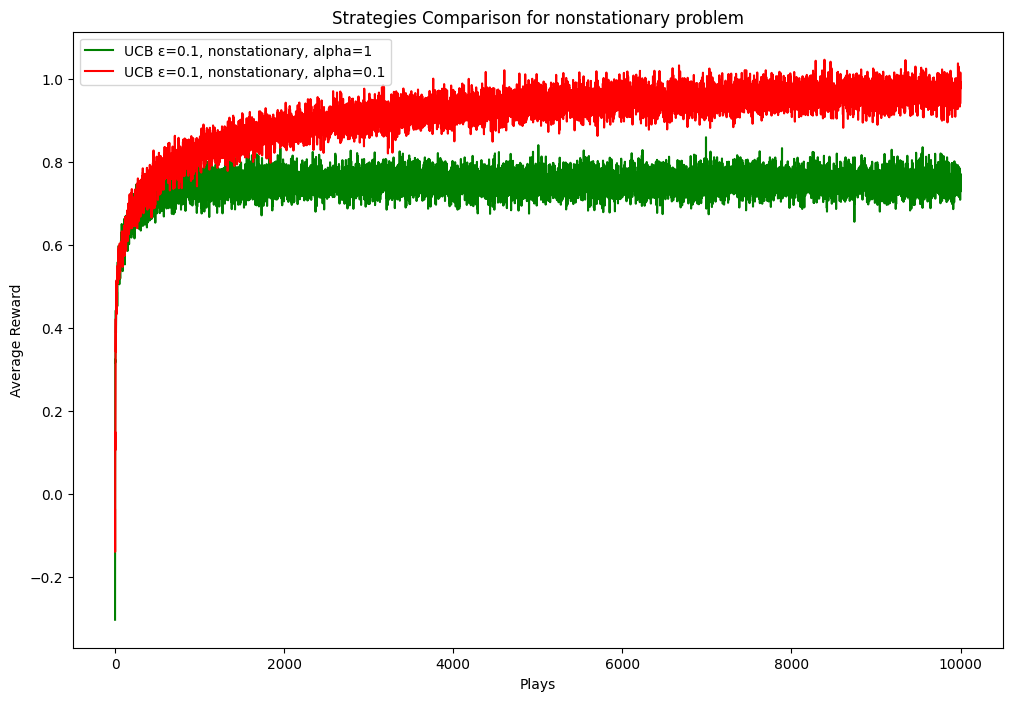

In [35]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(avg_rewards_ucb_01_nonstationary_1, label='UCB ε=0.1, nonstationary, alpha=1', color='green')
plt.plot(avg_rewards_ucb_01_nonstationary_01, label='UCB ε=0.1, nonstationary, alpha=0.1', color='red')
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Strategies Comparison for nonstationary problem')
plt.show()

In nonstationary situations, the true value of actions (rewards) varies with time. The primary issue with sample-average approaches in such situations is that they rely largely on the history of all previous rewards to estimate action values. While this method works well in stationary settings, it is less dependable in nonstationary problems since past incentives may no longer be predictive of future rewards.

1. Initial performance:


Because the action-value estimations are based on minimal data, both methods begin with comparable performance. The impact of nonstationarity is not immediately apparent.

2. Performance in nonstationary environments:


The technique based on sample averages struggles to adjust to changes in genuine action values. Because it averages all previous rewards, its predictions become more wrong as the environment changes. As a result, the technique becomes stuck on activities that were previously optimal but are no longer the best options.
Using a constant step-size parameter (α) improves long-term performance by prioritizing recent rewards and being more responsive to changes in action values. This method enables it to respond more swiftly to fluctuating rewards while maintaining greater average payouts over time.